In [1]:
# Uploading the dataset files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [35]:
train_df = pd.read_csv("train.csv")
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

In [43]:
X = train_df[features]
y = np.log1p(train_df[target])
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 47419.13


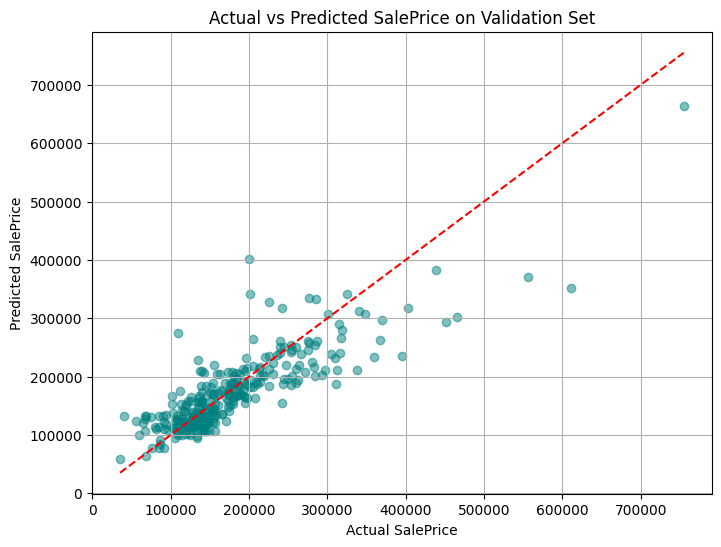

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(y_val_orig, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice on Validation Set")
plt.plot([y_val_orig.min(), y_val_orig.max()], [y_val_orig.min(), y_val_orig.max()], 'r--')
plt.grid(True)
plt.show()

In [47]:
test_df = pd.read_csv("test.csv")
X_test = test_df[features]
X_test_poly = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_poly)
final_predictions_log = model.predict(X_test_scaled)
final_predictions = np.expm1(final_predictions_log)

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_val_orig, y_pred)
mae = mean_absolute_error(y_val_orig, y_pred)
mape = np.mean(np.abs((y_val_orig - y_pred) / y_val_orig)) * 100

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R² Score: {r2:.4f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation MAPE: {mape:.2f}%")

Validation RMSE: 47419.13
Validation R² Score: 0.7068
Validation MAE: 31698.34
Validation MAPE: 19.25%


In [50]:
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'PredictedSalePrice': final_predictions
})
submission_df.to_csv("submission.csv", index=False)
print("✅ Predictions saved to 'submission.csv'. Preview:")
print(submission_df.head())

✅ Predictions saved to 'submission.csv'. Preview:
     Id  PredictedSalePrice
0  1461       110484.019107
1  1462       143526.545053
2  1463       192517.899469
3  1464       189041.848094
4  1465       177912.300271
